<a href="https://colab.research.google.com/github/Sofieagerbaek/NN.project.2021/blob/master/Mini_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading packages

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Loading data into tensors of right dimension


In [ ]:
train = pd.read_csv("train_chr20_short.tsv", sep = "\t")
train_features = torch.as_tensor(train.iloc[:,5:].values).float()
train_labels = torch.as_tensor(train.iloc[:,4].values).float()
train_labels = torch.unsqueeze(train_labels, dim = -1)

In [ ]:
val = pd.read_csv("val_chr20_short.tsv", sep = "\t")
val_features = torch.as_tensor(val.iloc[:,5:].values).float()
val_labels = torch.as_tensor(val.iloc[:,4].values).float()
val_labels = torch.unsqueeze(val_labels, dim = -1)

In [ ]:
train_labels

tensor([[0.4245],
        [0.3130],
        [0.0079],
        ...,
        [0.4046],
        [0.4072],
        [0.1164]])

# Neural network


In [ ]:
train_data = TensorDataset(train_features, train_labels)
val_data = TensorDataset(val_features, val_labels)

In [ ]:
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
val_loader = DataLoader(dataset = val_data, batch_size=32)
#Ensures the data is loaded index-wise and simplifies code

In [ ]:
class NeuralNet(torch.nn.Module):
    
    def __init__(self, input_len, h1_size, p):
        super(NeuralNet, self).__init__()
        self.h1 = torch.nn.Linear(input_len, h1_size)       
        self.output_layer = torch.nn.Linear(h1_size, 1)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.nn.functional.relu(self.h1(x))
        x = self.dropout(x)
        y = self.output_layer(x)
        return y

In [ ]:
def make_train_step(model, loss_fn, optimizer):
    def perform_train_step(x, y):
        model.train()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()

    return perform_train_step

In [ ]:
def make_validation_step(model, loss_fn):
    def perform_validation_step(x, y):
        model.eval()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        return loss.item()

    return perform_validation_step

In [ ]:
def mini_batch_descent(data_loader, step):
  losses = []
  for x_batch, y_batch in data_loader:
    mini_batch_loss = step(x_batch, y_batch)
    losses.append(mini_batch_loss)
  loss = np.mean(losses)
  return loss

In [ ]:
#Initializing
lr = 1e-3
input_len = train_features.shape[1] 
h1_size = 15
model = NeuralNet(input_len, h1_size, 0.5)
loss = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_step = make_train_step(model, loss, optimizer)
val_step = make_validation_step(model, loss)

#Actual training loop

n_epochs = 20

train_losses = []
val_losses = []

for epoch in range(n_epochs):
  #training
  train_loss = mini_batch_descent(train_loader, train_step)
  train_losses.append(train_loss)

  #Validation
  with torch.no_grad():
    val_loss = mini_batch_descent(val_loader, val_step)
    val_losses.append(val_loss)



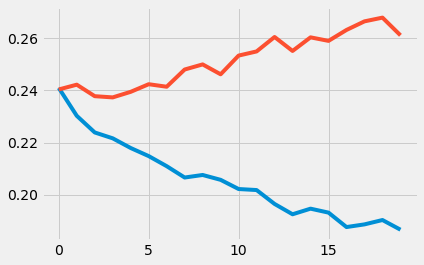

In [ ]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.savefig("losses.png")

In [ ]:
import seaborn as sns

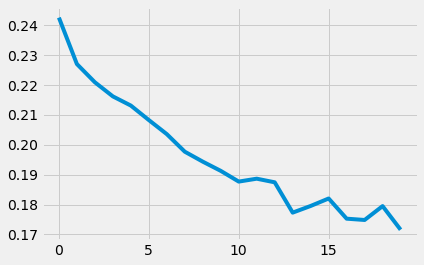

In [ ]:
train_loss_figure = sns.lineplot(y=train_losses, x=range(len(train_losses)))
fig = train_loss_figure.get_figure()
fig.savefig("train_loss_batch")

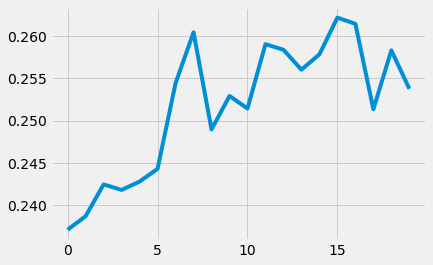

In [ ]:
sns.lineplot(y=val_losses, x=range(len(val_losses)))

#Deepen the model 

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=50,shuffle=True)
val_loader = DataLoader(dataset = val_data, batch_size=50)
#Ensures the data is loaded index-wise and simplifies code

In [ ]:
class NeuralNet(torch.nn.Module):
    
    def __init__(self, input_len, h1_size, h2_size, p):

        super(NeuralNet, self).__init__()
        self.h1 = torch.nn.Linear(input_len, h1_size)
        self.h2 = torch.nn.Linear(h1_size, h2_size)       
        self.output_layer = torch.nn.Linear(h2_size, 1)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.nn.functional.relu(self.h1(x))
        x = torch.nn.functional.relu(self.h2(x))
        z = self.dropout(x)
        y = self.output_layer(z)

        return y

In [ ]:
#n = train_features.shape[0]
n = 300000*300000
(4*n+3)/(n-8)

4.000000000388889

In [ ]:
#Initializing
lr = 1e-3
input_len = train_features.shape[1] 
h1_size = 6
h2_size = 3

p = 0.5 #dropout probability
model = NeuralNet(input_len, h1_size, h2_size, p)
loss = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_step = make_train_step(model, loss, optimizer)
val_step = make_validation_step(model, loss)

#Actual training loop

n_epochs = 20

train_losses = []
val_losses = []

for epoch in range(n_epochs):
  #training
  train_loss = mini_batch_descent(train_loader, train_step)
  train_losses.append(train_loss)

  #Validation
  with torch.no_grad():
    val_loss = mini_batch_descent(val_loader, val_step)
    val_losses.append(val_loss)



Text(0.5, 1.0, '2 hidden layers')

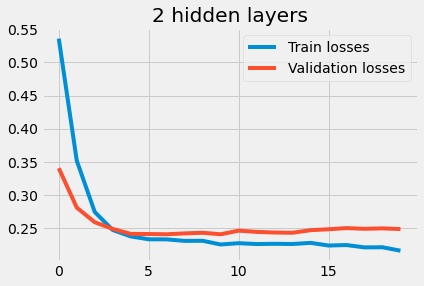

In [ ]:
plt.plot(train_losses, label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.title("2 hidden layers")
print(train_loss)

In [ ]:
#3 skjulte lag
class NeuralNet(torch.nn.Module):
    
    def __init__(self, input_len, h1_size, h2_size, h3_size, p):

        super(NeuralNet, self).__init__()
        self.h1 = torch.nn.Linear(input_len, h1_size)
        self.h2 = torch.nn.Linear(h1_size, h2_size)
        self.h3 = torch.nn.Linear(h2_size, h3_size)       
        self.output_layer = torch.nn.Linear(h3_size, 1)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = torch.nn.functional.relu(self.h1(x))
        x = torch.nn.functional.relu(self.h2(x))
        x = torch.nn.functional.relu(self.h3(x))
        z = self.dropout(x)
        y = self.output_layer(z)

        return y

In [ ]:
lr = 1e-3
input_len = train_features.shape[1] 
h1_size = 6
h2_size = 4
h3_size = 3
p = 0.5 #dropout probability
model = NeuralNet(input_len, h1_size, h2_size, h3_size, p)
loss = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_step = make_train_step(model, loss, optimizer)
val_step = make_validation_step(model, loss)

#Actual training loop

n_epochs = 20

train_losses = []
val_losses = []

for epoch in range(n_epochs):
  #training
  train_loss = mini_batch_descent(train_loader, train_step)
  train_losses.append(train_loss)

  #Validation
  with torch.no_grad():
    val_loss = mini_batch_descent(val_loader, val_step)
    val_losses.append(val_loss)

0.24263382607783135


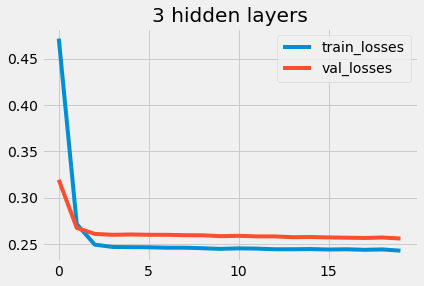

In [ ]:
plt.plot(train_losses, label = "train_losses")
plt.plot(val_losses, label = "val_losses")
plt.legend()
plt.title("3 hidden layers")
print(train_loss)

#Batch normalization

Regularization:
Linear --> batch-normalization --> activation --> drop-out

Der implementeres et BN lag før hver activation, desuden laves der drop out efter hvert lag. 

Der bruges torch.nn funktionen BatchNorm1d, da vores data er 2 dimensionelt 

In [ ]:
class NeuralNet(torch.nn.Module):
    
    def __init__(self, input_len, h1_size, h2_size, h3_size, p):

        super(NeuralNet, self).__init__()
        self.h1 = torch.nn.Linear(input_len, h1_size)
        self.h2 = torch.nn.Linear(h1_size, h2_size)
        self.h3 = torch.nn.Linear(h2_size, h3_size)  
        self.bn1 = torch.nn.BatchNorm1d(h1_size)
        self.bn2 = torch.nn.BatchNorm1d(h2_size)
        self.bn3 = torch.nn.BatchNorm1d(h3_size)
        self.output_layer = torch.nn.Linear(h3_size, 1)
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = self.h1(x)
        x = self.bn1(x)
        x = torch.nn.functional.relu(x)
        z = self.dropout(x)
        x = self.h2(z)
        x = self.bn2(x)
        x = torch.nn.functional.relu(x)
        z = self.dropout(x)
        x = self.h3(z)
        x = self.bn3(x)
        x = torch.nn.functional.relu(x)
        z = self.dropout(x)

        y = self.output_layer(z)

        return y

In [ ]:
lr = 1e-3
input_len = train_features.shape[1] 
h1_size = 6
h2_size = 4
h3_size = 2

p = 0.5 #dropout probability
model = NeuralNet(input_len, h1_size, h2_size, h3_size, p)
loss = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_step = make_train_step(model, loss, optimizer)
val_step = make_validation_step(model, loss)

#Actual training loop

n_epochs = 20

train_losses = []
val_losses = []

for epoch in range(n_epochs):
  #training
  train_loss = mini_batch_descent(train_loader, train_step)
  train_losses.append(train_loss)

  #Validation
  with torch.no_grad():
    val_loss = mini_batch_descent(val_loader, val_step)
    val_losses.append(val_loss)

0.24263382607783135


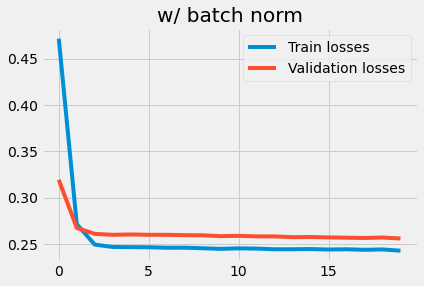

In [ ]:
plt.plot(train_losses, label = "Train losses")
plt.plot(val_losses, label = "Validation losses")
plt.legend()
plt.title("w/ batch norm")
print(min(train_losses))